In [1]:
import requests
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/clean/bitcoin_prices.csv")
# [ time, low, high, open, close, volume ],

In [7]:
total_days = df.shape[0] / 24
print("{} days with data".format(total_days))

hourly_change = (df["Close"] - df["Close"].shift(1))[1:]

hourly_change_as_percentage = (df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1)[1:]
print("{}% average hourly gain".format(np.mean(hourly_change) * 100))

yearly_df = df.iloc[::8760]
avg_yearly_gain = np.mean( ( (yearly_df["Close"] - yearly_df["Close"].shift(1)) / yearly_df["Close"].shift(1))[1:])
print("{}% average yearly gain".format(avg_yearly_gain * 100))

percent_hourly_increase = hourly_change[hourly_change >= 0].shape[0] / df.shape[0]
print("{}% percentage of days with positive gain".format(percent_hourly_increase * 100))

1987.4166666666667 days with data
55.952051491708076% average hourly gain
127.2047943403362% average yearly gain
52.18038492179966% percentage of days with positive gain


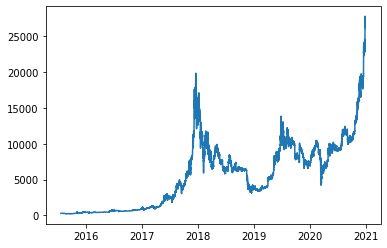

In [4]:
plt.plot(np.asarray(df["Time"], dtype='datetime64[s]'), df["Close"])

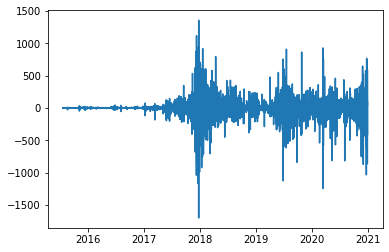

In [5]:
plt.plot(np.asarray(df["Time"][1:], dtype='datetime64[s]'), hourly_change)

In [8]:
plt.plot(np.asarray(df["Time"][1:], dtype='datetime64[s]'), percent_hourly_change)

NameError: name 'percent_hourly_change' is not defined

In [6]:
max_change = df.iloc[np.argmax(hourly_change)]
print(df.iloc[np.argmax(hourly_change)], df.iloc[np.argmax(hourly_change) + 1])
print(datetime.datetime.fromtimestamp(df.iloc[np.argmax(hourly_change)]["Time"]))
print(datetime.datetime.fromtimestamp(df.iloc[np.argmax(hourly_change) + 1]["Time"]))

Unnamed: 0    2.126200e+04
Time          1.513969e+09
Low           1.300000e+04
High          1.359900e+04
Open          1.348900e+04
Close         1.341000e+04
Volume        3.154317e+03
Name: 21262, dtype: float64 Unnamed: 0    2.126300e+04
Time          1.513973e+09
Low           1.330036e+04
High          1.482602e+04
Open          1.341000e+04
Close         1.476588e+04
Volume        5.573661e+03
Name: 21263, dtype: float64
2017-12-22 13:00:00
2017-12-22 14:00:00


In [154]:
shifts = df["Time"] - df["Time"].shift(1)
shifts[shifts != 3600].index
shifts[shifts != 3600]

0   NaN
Name: Time, dtype: float64